# Matrix Formalism of the  Equations of Movement

> Renato Naville Watanabe, Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](https://bmclab.pesquisa.ufabc.edu.br/)  
> Federal University of ABC, Brazil

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Forward-Dynamics" data-toc-modified-id="Forward-Dynamics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Forward Dynamics</a></span></li><li><span><a href="#Problems" data-toc-modified-id="Problems-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problems</a></span></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In this notebook will be shown two examples of how to use a matrix formalism to perform forward dynamics. It does not consist a comprehensive treatise about the subject. It is rather an introduction based on examples. Nevertheless, the reader of this notebook will have sufficient knowledge to read recent texts on biomechanics and other multibody dynamic analysis.
 

## Forward Dynamics

For the forward dynamics analysis, we will consider that we know the torques and find the angular accelerations. Naturally, we could begin our analysis from the muscle forces, from the muscle activations or even from the neural commands from the motor cortex. 

<figure><img src="../images/foward.png" width=600/> <figcaption><i><center>Adapted from Erdemir et al. (2007) </center></i></figcaption>
        

As an introduction to the matrix formalism used in multibody analysis, we will consider the double-pendulum system. This system could be used as a  model from the arm and forearm of a subject, for example, and is an example of chaotic system.

In the notebook about [free-body diagram](FreeBodyDiagramForRigidBodies.ipynb#doublependulum), we found the following equations of motion to the double-pendulum with actuators.  

<span class="notranslate">
\begin{align}
\begin{split}
     \left(\frac{m_1l_1^2}{3} +m_2l_1^2\right)\frac{d^2\theta_1}{dt^2} + \frac{m_2l_1l_2}{2} \cos{(\theta_1-\theta_2)\frac{d^2\theta_2}{dt^2}}  &=  -\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1)   - \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)  + M_1 - M_{12} \\
    \frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)\frac{d^2\theta_1}{dt^2} + \frac{m_2l_2^2}{3}\frac{d^2\theta_2}{dt^2} &= -\frac{m_2gl_2}{2}\sin(\theta_2) + \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)+ M_{12} 
    \end{split}
\end{align}
</span>

If we wanted to simulate this double pendulum we still need to isolate the angular accelerations of each of the bars. As can be easily noted, this would be too laborious to do by hand. Luckily, numerical integration is performed by computers. The easiest way to isolate these angular accelerations is to note that we can write the angular accelerations and the numbers multiplying them as a matrix and a vector. 

<span class="notranslate">
\begin{equation}
     \left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]\cdot\left[\begin{array}{c}\frac{d^2\theta_1}{dt^2}\\\frac{d^2\theta_2}{dt^2} \end{array}\right] = \left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)-\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1) + M_1 - M_{12}\\ \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)-\frac{m_2gl_2}{2}\sin(\theta_2) + M_{12} \end{array}\right] 
\end{equation}
</span>

   Typically the equations of motion are divided into a matrix corresponding to the terms involving the angular velocities (centrifugal and Coriolis forces), a  matrix corresponding to gravitational force and another matrix corresponding to the forces and torques being applied to the system.

<span class="notranslate">
\begin{equation}
    M(q)\ddot{q} = C(q,\dot{q}) + G(q) + Q +  E
\end{equation}
</span>

where 

- <span class="notranslate">$q$</span> is the vector of the generalized coordinates, like angles and positions;
- <span class="notranslate">$M(q)$</span> is the matrix containing the inertia elements like mass and moments of inertia;
- <span class="notranslate">$C(q,\dot{q})$</span>  is the vector with the forces and moments dependent from the velocities and angular velocities, like centrifugal and Coriolis forces;
- <span class="notranslate">$G(q)$</span> is the vector with the forces and torques caused by the gravitational force;
- <span class="notranslate">$Q$</span> is the vector with forces and torques being applied to the body, like muscular torques and forces due to the constraints.
- <span class="notranslate">$E$</span> is the vector with the forces and torques due to some external element, like springs or the Ground reaction Force.

We can divide the equation describing the behavior of the double-pendulum in the matrices above:

<span class="notranslate">
\begin{equation}
     \underbrace{\left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]}_{M}\cdot\underbrace{\left[\begin{array}{c}\frac{d^2\theta_1}{dt^2}\\\frac{d^2\theta_2}{dt^2} \end{array}\right]}_{\ddot{q}} = \underbrace{\left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)\\ \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)\end{array}\right]}_{C} + \underbrace{\left[\begin{array}{c}-\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1)\\ -\frac{m_2gl_2}{2}\sin(\theta_2) \end{array}\right]}_{G} + \underbrace{\left[\begin{array}{c} M_1 - M_{12}\\M_{12} \end{array}\right]}_{Q}
\end{equation}
</span>

To solve this differential equation numerically, we must obtain the expression of the angular accelerations. We can perform this by multiplying both sides by the inverse of the matrix $M$.

<span class="notranslate">
\begin{equation}
    \left[\begin{array}{c}\frac{d^2\theta_1}{dt^2}\\\frac{d^2\theta_2}{dt^2} \end{array}\right] = \left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]^{-1}\cdot\left(\left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)\\ \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)\end{array}\right] + \left[\begin{array}{c}-\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1)\\ -\frac{m_2gl_2}{2}\sin(\theta_2) \end{array}\right] + \left[\begin{array}{c} M_1 - M_{12}\\M_{12} \end{array}\right]\right)
\end{equation}
</span>

Generically, having the differential equations in the format:

<span class="notranslate">
\begin{equation}
    M(q)\ddot{q} = C(q,\dot{q}) + G(q) + Q +  E
\end{equation}
</span>

we can obtain the equation to perform the forward dynamics by:

<span class="notranslate">
\begin{equation}
    \ddot{q} = M(q)^{-1}\left[C(q,\dot{q}) + G(q) + Q +  E\right]
\end{equation}
</span>


Now that we have the angular accelerations, to solve the equation numerically we must transform the second-order differential equations in first-order differential equations:

<span class="notranslate">
\begin{equation}
    \left[\begin{array}{c}\frac{d\omega_1}{dt}\\\frac{d\omega_2}{dt}\\\frac{d\theta_1}{dt}\\\frac{d\theta_2}{dt} \end{array}\right] =  \left[\begin{array}{c}\left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]^{-1}\left(\left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\omega_2^2 \sin(\theta_1-\theta_2)\\ \frac{m_2l_1l_2}{2}\omega_1^2 \sin(\theta_1-\theta_2)\end{array}\right]+\left[\begin{array}{c} -\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1) \\-\frac{m_2gl_2}{2}\sin(\theta_2)  \end{array}\right] + \left[ \begin{array}{c}M_1 - M_{12}\\M_{12}\end{array}\right]\right)\\ \omega_1\\ \omega_2\end{array}\right]
\end{equation}
</span>

Below is the numerical solution of a double-pendulum with each bar having length equal to 1 m and mass equal to 1 kg.

In [1]:
import numpy as np

g = 9.81
    
m1 = 1
m2 = 1
l1 = 1
l2 = 0.5

theta10 = np.pi/10
theta20 = np.pi/3
omega10 = 2*np.pi
omega20 = -6*np.pi

dt = 0.0001
t = np.arange(0, 20, dt)
state = np.zeros((4, len(t)))

state[:,0] = np.array([omega10, omega20, theta10, theta20])
#print(state[0,0])
M1 = 0
M12 = 0

for i in range(1,len(t)):
   
    thetaDiff = state[2,i-1] - state[3,i-1]
      
    M = np.array([[m1*l1**2/3 + m2*l1**2, m2*l1*l2*np.cos(thetaDiff)/2],
                  [m2*l1*l2*np.cos(thetaDiff)/2, m2*l2**2/3]])

    C = np.array([[-m2*l1*l2*np.sin(thetaDiff)*state[1,i-1]**2/2],
                  [m2*l1*l2*np.sin(thetaDiff)*state[0,i-1]**2/2]])

    G = np.array([[-m1*g*l1/2*np.sin(state[2,i-1]) - m2*g*l2*np.sin(state[2,i-1])],
                  [-m2*g*l2/2*np.sin(state[3,i-1])]])

    #PID control
    #r = np.pi/3
    #M12 = 30*(r-state[3,i-1])- 2*state[1,i-1] + 3*np.trapz(r-state[3,0:i])*dt
    Q = np.array([[M1 - M12],[M12]])
    
    
    
    dstatedt = np.vstack((np.linalg.inv(M)@(C+G+Q),state[0,[i-1]],state[1,[i-1]]))
    
    state[:,[i]] =  state[:,[i-1]] + dt*dstatedt



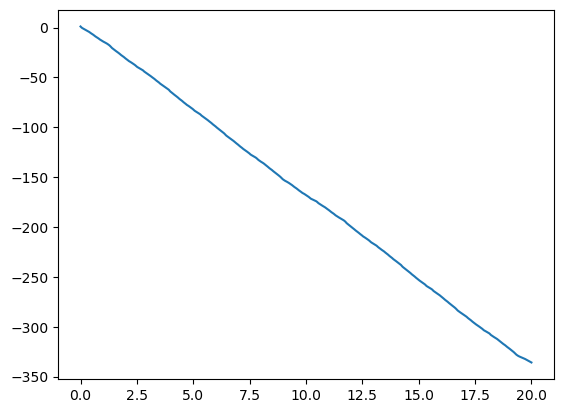

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t[0::10], state[3,0::10].T)
#plt.plot(t[0::10], r*np.ones_like(t[0::10]))
plt.show()

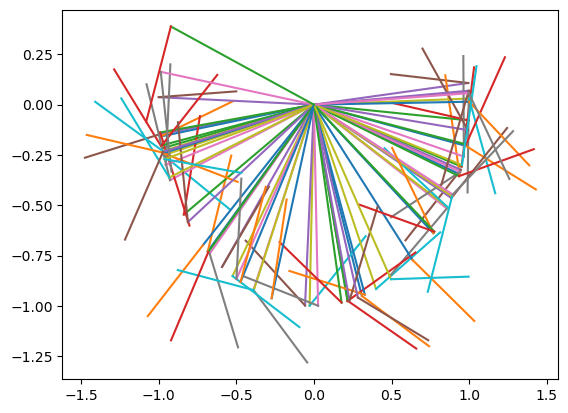

In [3]:
plt.figure()

step = 3000

for i in range(len(state[2,0::step])):
    
    plt.plot([0, l1*np.sin(state[2,i*step])], 
             [0, -l1*np.cos(state[2,i*step])])
    plt.plot([l1*np.sin(state[2,i*step]), l1*np.sin(state[2,i*step])+l2*np.sin(state[3,i*step])], 
             [-l1*np.cos(state[2,i*step]), -l1*np.cos(state[2,i*step])-l2*np.cos(state[3,i*step])])
plt.show()

## Automating equations of motion in matrix form using symbolic computation

Sympy can be used to write the equation of motion and express them in matrix form, see an example in the notebook [Multibody Dynamics](https://nbviewer.org/github/BMClab/BMC/blob/master/notebooks/MultibodyDynamics.ipynb).

## Examples

See examples of the deduction of the equations of motion in matrix form for the following systems:  
  - [A cart attached to a spring and a pendulum](https://youtu.be/gsi_0cVZ5-s)  
  - [Two sliding masses attached to two springs](https://youtu.be/dqtZwZmMh4w)

## Further reading

- Nikooyan and Zadpoor (2011) reviews mass-spring-damper models developed to study the response of the human body to the collision with the ground during hopping, trotting, or running, and presents the parameters of these models as terms of the equations of motion in matrix form.  
- Hollerbach and Flash (1982) used a planar two-link system model to investigate the dynamics of the upper limb during reaching movements. In such model, the two terms off the main diagonal in the inertia matrix (which are the same) and the centripetal and Coriolis terms represent the effects of the movement (nonzero velocity) of one joint over the other. These torques are referred as coupling or interaction effects.

## Problems

1. Solve the problems 19.3.20 and 19.3.24 of the Ruina and Rudra's book using the Lagrangian formalism (it is much easier than use the Newton-Euler formalism) and then use the matrix formalism to obtain the expressions of the angular accelerations.  
2. Derive the equations of motion in matrix form for the system below (see solution at https://youtu.be/ositbkD5J2M):  
<figure><img src="./../images/masses_springs_gravity.png" width="200" alt="masses_springs_gravity"/></figure>  

## References 

 - YAMAGUCHI, G. T. Dynamic modeling of musculoskeletal motion: a vectorized approach for biomechanical analysis in three dimensions., 2001.  
 - CRAIG, J. Introduction to robotics. , 1989.  
 - JAIN, A. Robot and multibody dynamics. , 2011.  
 - SPONG, M. W.; HUTCHINSON, S.; VIDYASAGAR, M. Robot modeling and control., 2006.  
 - ERDEMIR, A. et al. Model-based estimation of muscle forces exerted during movements. Clinical Biomechanics, v. 22, n. 2, p. 131–154, 2007. 
 - Hollerbach JM, Flash T (1982) [Dynamic interactions between limb segments during planar arm movement](http://link.springer.com/article/10.1007%2FBF00353957). Biological Cybernetics, 44, 67-77.  
 - Nikooyan AA, Zadpoor AA. Mass-spring-damper modelling of the human body to study running and hopping--an overview. Proc Inst Mech Eng H. 2011 Dec;225(12):1121-35. doi: 10.1177/0954411911424210. PMID: 22320052.
 - STANEV, D.; MOUSTAKAS, K. Simulation of constrained musculoskeletal systems in task space. IEEE Transactions on Biomedical Engineering, v. 65, n. 2, p. 307–318, 2018.  
 - ZAJAC FE, GORDON ME , [Determining muscle's force and action in multi-articular movement](https://drive.google.com/open?id=0BxbW72zV7WmUcC1zSGpEOUxhWXM&authuser=0). Exercise and Sport Sciences Reviews, 17, 187-230. , 1989.    
 - RUINA A, RUDRA P. [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press. , 2015.  